In [1]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
# import seaborn as sns
from scipy.special import jn_zeros
import sys
from mpl_toolkits import mplot3d
PlotParams(fontsize=10)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T


def FloatToStringSave(a):
    return str(a).replace(".", "p")

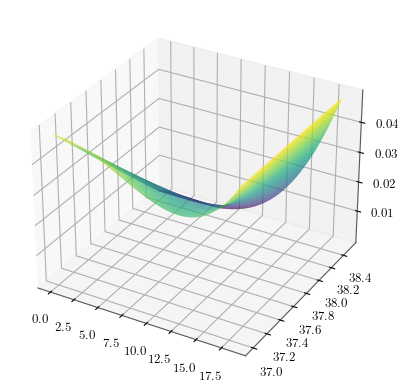

In [11]:
# dfO = pd.read_csv("D:Data/Set21-alpha=1,beta=2,omega=8,local/"+"data_3.csv",
#                            index_col=False)
dfO = pd.read_csv(Path().absolute().parent.parent/"paper_data"/"data_3.csv")
# dfO = pd.read_csv("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/FT-Min,phi3=0.csv",
#                   index_col=False)
# dfP0 = pd.read_csv("D:/Data/Set12-alpha=1,beta=2,omega=8/Summaries/FT-ABS-phi3=0.csv", 
#                     index_col = False)
dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)



# domains
dfP0 = dfO[(dfO.A3 <= 38.5)
          &(dfO.A3 >=37)
          &(dfO.A2 <=18.5)]
# n_section = 820
# A2 = np.resize(np.array(dfP.A2.to_list()), (n_section, n_section))
# A3 = np.resize(np.array(dfP.A3.to_list()), (n_section, n_section))
# X = np.resize(np.array(dfP["FT-LowerT.X"].to_list()), (n_section, n_section))
# Y = np.resize(np.array(dfP["FT-LowerT.Y"].to_list()), (n_section, n_section))


#%%
"""plot raw hopping"""
x = np.array(dfP0.A2.to_list())
y = np.array(dfP0.A3.to_list())
J12 = np.array(dfP0["FT-J12-ABS"].to_list())
J23 = np.array(dfP0["FT-J23-ABS"].to_list())
J31 = np.array(dfP0["FT-J31-ABS"].to_list())


# fig= plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_trisurf(x, y, J12, cmap='viridis', edgecolor='none')
# plt.show()


fig= plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, J23, cmap='viridis', edgecolor='none')
plt.show()

# fig= plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_trisurf(x, y, J31, cmap='viridis', edgecolor='none')
# plt.show()



In [15]:

"""plot just with J12, J23, J31"""

dfO["FT-J23oJ12"] = dfO["FT-J23-ABS"] / dfO["FT-J12-ABS"]
dfO["FT-J31oJ12"] = dfO["FT-J31-ABS"] / dfO["FT-J12-ABS"]

dfO["HE-J23oJ12"] = dfO["HE-J23-ABS"] / dfO["HE-J12-ABS"]
dfO["HE-J31oJ12"] = dfO["HE-J31-ABS"] / dfO["HE-J12-ABS"]
dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = 18.5
A2_range = int((A2_max - A2_min)*10 +1)
A3_min = 37
A3_max = 38.5
A3_range = int((A3_max - A3_min)*10 +1)
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]
# dfP = dfO
n_section_x = A3_range#401#16; 
n_section_y = A2_range#301#186
A2_square = np.resize(np.array(dfP.A2.to_list()), (n_section_x, n_section_y))
A3_square = np.resize(np.array(dfP.A3.to_list()), (n_section_x, n_section_y))
X = np.resize(np.array(dfP["FT-J23oJ12"].to_list()), (n_section_x, n_section_y))
# X = np.resize(np.array(dfP["FT-LowerT.X"].to_list()), (n_section_x, n_section_y))
Y = np.resize(np.array(dfP["FT-J31oJ12"].to_list()), (n_section_x, n_section_y))
# Y = np.resize(np.array(dfP["FT-LowerT.Y"].to_list()), (n_section_x, n_section_y))

X1 = np.where(X<1, X, np.nan)
Y1 =np.where(X<1, Y, np.nan)


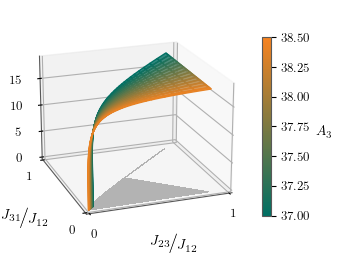

In [13]:

# create colormap according to x-value (can use any 50x50 array)
color_dimension = A3_square # change to desired fourth dimension
z_dimension = A2_square
PlotParams(fontsize=10)
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)



figsize=(9,9)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
ax.view_init(20,250)
# ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,z_dimension, 
                facecolors=fcolors,
                vmin=minn, vmax=maxx,
                rstride=1, cstride=1,  alpha=0.8, 
                shade=False,
                        linewidth=1,
                        antialiased=True
                        )
cset = ax.contourf(X, Y, z_dimension, zdir='z', offset=np.min(z_dimension),colors="0.7")
ax.zaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel(r'$\nicefrac{J_{23}}{J_{12}}$', labelpad = 0.0001, rotation=0, fontsize=14.9)
ax.set_ylabel(r'$\nicefrac{J_{31}}{J_{12}}$', labelpad = 2, rotation = 0, fontsize=14.9)
ax.set_zlabel(r'$A_2$', labelpad = 8, rotation=0)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)
ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size='5%', pad=0.6)
# cax = divider.append_axes('right', size=f"5%", pad=0.01)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)# label="unweighted graph distance")
# fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, shrink =0.55)

# divider = make_axes_locatable(ax)

# cax = divider.append_axes('right', size=f"10%", pad=0.05)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar = plt.colorbar(m)
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=10)
fig.canvas.draw() 
plt.tight_layout()
# fig.savefig(Path().absolute().parent/"figures"/"paper"/"3d_tunnelling_cover2.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [2]:
df_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega=8,alpha=1,beta=1,phi3=0,2.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                                    })


dfO["FT-J12oJ23"] = np.abs(dfO["FT-J12"] / dfO["FT-J23"])
dfO["FT-J31oJ23"] = np.abs(dfO["FT-J31"] / dfO["FT-J23"])

dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = jn_zeros(0,1)[0]*8
A2_range = len(np.append(np.linspace(0,19.2,193), [1]))
A3_min = 0
A3_max = jn_zeros(0,1)[0]*8
A3_range = len(np.append(np.linspace(0,19.2,193), [1]))
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]
# dfP = dfO
n_section_x = A3_range#401#16; 
n_section_y = A2_range#301#186


A2_square = np.resize(np.array(dfP.A2.to_list()), (n_section_x, n_section_y))
A3_square = np.resize(np.array(dfP.A3.to_list()), (n_section_x, n_section_y))
X = np.resize(np.array(dfP["FT-J12oJ23"].to_list()), (n_section_x, n_section_y))
# X = np.resize(np.array(dfP["FT-LowerT.X"].to_list()), (n_section_x, n_section_y))
Y = np.resize(np.array(dfP["FT-J31oJ23"].to_list()), (n_section_x, n_section_y))
# Y = np.resize(np.array(dfP["FT-LowerT.Y"].to_list()), (n_section_x, n_section_y))



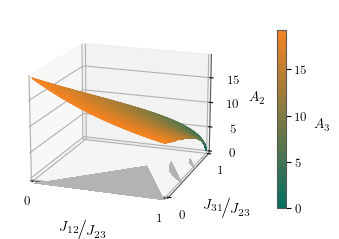

In [5]:

# create colormap according to x-value (can use any 50x50 array)
color_dimension = A3_square # change to desired fourth dimension
z_dimension = A2_square
PlotParams(fontsize=10)
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

#remove parts outside the triangl
# X = np.where(Y>1.2, np.nan, X)
# Y =np.where(Y>1.2, np.nan, Y)
X = np.where(X<1, X, np.nan)
Y =np.where(X<1, Y, np.nan)
# X = np.where(X<0, np.nan, X)
# Y = np.where(Y>1, np.nan, Y)
# Y = np.where(Y<0, np.nan, Y)

X = np.where(X>Y, X, np.nan)
Y = np.where(X>Y, Y, np.nan)

figsize=(9,9)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
ax.view_init(17,290)
# ax = fig.gca(projection='3d')
X[5,5]=np.nan
Y[5,5]=np.nan
z_dimension[5,5]=np.nan
surf = ax.plot_surface(X,Y,z_dimension, 
                facecolors=fcolors,
                vmin=minn, vmax=maxx,
                rstride=1, cstride=1,  alpha=0.8, 
                shade=False,
                        linewidth=1,
                        antialiased=True
                        )
cset = ax.contourf(X, Y, z_dimension, zdir='z', offset=1,colors="0.7")

ax.zaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.xaxis.set_rotate_label(False) 
ax.set_xlabel(r'$\nicefrac{J_{12}}{J_{23}}$', labelpad = 0.0001, rotation=0, fontsize=14.9)
ax.set_ylabel(r'$\nicefrac{J_{31}}{J_{23}}$', labelpad = 2, rotation = 0, fontsize=14.9)
ax.set_zlabel(r'$A_2$', labelpad = 2, rotation=0)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)
ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size='5%', pad=0.6)
# cax = divider.append_axes('right', size=f"5%", pad=0.01)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)# label="unweighted graph distance")
# fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, shrink =0.55, pad=0.15)


# cax = divider.append_axes('right', size=f"10%", pad=0.05)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar = plt.colorbar(m)
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=10)
fig.canvas.draw() 
plt.tight_layout()
# fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"3d_tunnelling_cover3.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
np.all(np.isnan(Y)==np.isnan(z_dimension))

False